In [91]:
import pandas as pd
import numpy as np
import sigfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
plt.rcParams.update(mpl.rcParamsDefault)

def rd(valor, error):
    return eval('("' + sigfig.round(valor, error, cutoff=19, sep ='","') + '")')


def tex(panda, columnas):
    l = len(panda)
    a = len(columnas)
    print('\\begin{array}{|' + 'l|'*a + '} \\hline')
    for fila in range(l):
        s = ''
        for col in columnas:
            s+= str(panda[col][fila]) + ' & '
        print(s[0: -2] + ' \\\\ \\hline')
    print('\\end{array}')

def regresion(x, y):
    n = len(x)
    xc = x.sum()/n
    yc = y.sum()/n
    sx = math.sqrt(((x**2).sum()/n)-xc**2)
    sy = math.sqrt(((y**2).sum()/n)-yc**2)
    sxy = ((x*y).sum()/n)-xc*yc
    r = sxy/(sx*sy)
    m = sxy/(sx**2)
    b = yc - m*xc
    em = (sy/sx)*math.sqrt((1-r**2)/(n-2))
    eb = em*math.sqrt(sx**2 + xc**2)
    return(m, b, em, eb, r)

Cargar datos

In [92]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/hooke/Datos/hooke1.csv', names=['m','x'])

In [93]:
datos['ex'] = datos['x']
datos['em'] = datos['x']
for i in range(len(datos)):
    datos['ex'][i] = 0.001
    datos['em'][i] = 0.002

In [94]:
g = -9.847

datos['F'] = g*datos['m']
datos['eF'] = g*datos['em']

In [95]:
datos[['Fstr', 'eFstr']] = datos[['F', 'eF']].astype(str)
for i in range(len(datos)):
    a, b = rd(datos['F'][i], datos['eF'][i])
    datos['Fstr'][i], datos['eFstr'][i] = a, b
    datos['F'][i], datos['eF'][i] = a, b

C:\Users\User\AppData\Local\Temp/ipykernel_5884/704906533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Fstr'][i], datos['eFstr'][i] = a, b
C:\Users\User\AppData\Local\Temp/ipykernel_5884/704906533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['F'][i], datos['eF'][i] = a, b


In [96]:
tex(datos, ['x', 'ex', 'm', 'em','Fstr', 'eFstr'])

\begin{array}{|l|l|l|l|l|l|} \hline
0.007 & 0.001 & 0.01 & 0.002 & -0.10 & 0.02  \\ \hline
0.013 & 0.001 & 0.02 & 0.002 & -0.20 & 0.02  \\ \hline
0.019 & 0.001 & 0.03 & 0.002 & -0.30 & 0.02  \\ \hline
0.026 & 0.001 & 0.04 & 0.002 & -0.39 & 0.02  \\ \hline
0.031 & 0.001 & 0.05 & 0.002 & -0.49 & 0.02  \\ \hline
0.037 & 0.001 & 0.06 & 0.002 & -0.59 & 0.02  \\ \hline
0.044 & 0.001 & 0.07 & 0.002 & -0.69 & 0.02  \\ \hline
0.05 & 0.001 & 0.08 & 0.002 & -0.79 & 0.02  \\ \hline
0.056 & 0.001 & 0.09 & 0.002 & -0.89 & 0.02  \\ \hline
0.064 & 0.001 & 0.1 & 0.002 & -0.98 & 0.02  \\ \hline
0.071 & 0.001 & 0.11 & 0.002 & -1.08 & 0.02  \\ \hline
0.077 & 0.001 & 0.12 & 0.002 & -1.18 & 0.02  \\ \hline
0.083 & 0.001 & 0.13 & 0.002 & -1.28 & 0.02  \\ \hline
0.09 & 0.001 & 0.14 & 0.002 & -1.38 & 0.02  \\ \hline
0.093 & 0.001 & 0.15 & 0.002 & -1.48 & 0.02  \\ \hline
0.099 & 0.001 & 0.16 & 0.002 & -1.58 & 0.02  \\ \hline
0.106 & 0.001 & 0.17 & 0.002 & -1.67 & 0.02  \\ \hline
0.111 & 0.001 & 0.18 & 0.002 & -

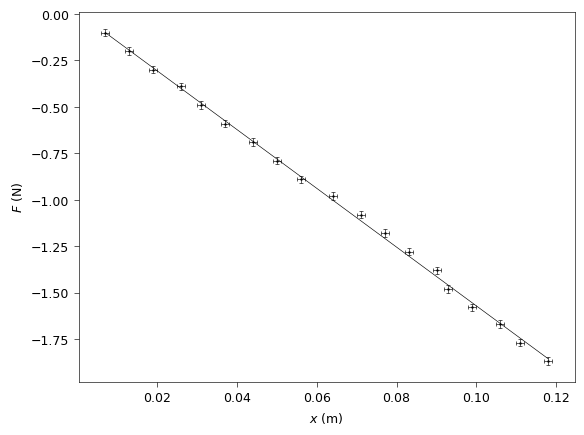

In [97]:
m, n, em, en, r = regresion(datos['x'], datos['F'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.45
plt.rcParams['xtick.major.width'] = 0.45
plt.rcParams['ytick.major.width'] = 0.45
plt.xlabel('$x$ (m)')
plt.ylabel('$F$ (N)')
plt.plot([0.007, 0.118], [m*0.007+n, m*0.118+n], color='black', linewidth=0.45)
plt.errorbar(datos['x'], datos['F'], xerr=datos['ex'], yerr=datos['eF'], ls='none', capsize = 1.5, elinewidth=0.45, ecolor='black', capthick=0.45)
plt.scatter(datos['x'], datos['F'], s=0.6, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/hooke/figures/regresión1.png', dpi=1000, bbox_inches='tight')
plt.show()

In [98]:
print('m:', rd(m, em))
m, em = rd(m, em)
m, em = float(m), float(em)
print('n:', rd(n, en))
n, en = rd(n, en)
n, en = float(n), float(en)

m: ('-15.83', '0.13')
n: ('0.011', '0.009')


In [99]:
datoss = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/hooke/Datos/hooke2.csv', names=['m','t1','t2','t3','t4'])

In [100]:
tex(datoss,['m','t1','t2','t3','t4'])

\begin{array}{|l|l|l|l|l|} \hline
0.03 & 3.69 & 3.69 & 3.9 & 3.59  \\ \hline
0.04 & 3.94 & 3.9 & 3.91 & 3.93  \\ \hline
0.05 & 4.28 & 4.25 & 4.33 & 4.25  \\ \hline
0.06 & 4.47 & 4.41 & 4.5 & 4.56  \\ \hline
0.07 & 4.75 & 4.81 & 4.65 & 4.88  \\ \hline
0.08 & 4.94 & 4.97 & 4.88 & 4.94  \\ \hline
0.09 & 5.22 & 5.25 & 5.2 & 5.0  \\ \hline
0.1 & 5.5 & 5.59 & 5.68 & 5.5  \\ \hline
0.12 & 5.88 & 5.91 & 5.93 & 5.81  \\ \hline
0.15 & 6.5 & 6.65 & 6.59 & 6.5  \\ \hline
0.17 & 6.97 & 6.94 & 6.94 & 6.97  \\ \hline
0.2 & 7.32 & 7.38 & 7.44 & 7.44  \\ \hline
\end{array}


In [101]:
datoss['et*'] = datoss['t1']
datoss['t*'] = datoss['t1']
for fila in range(12):
    l =[datoss['t1'][fila], datoss['t2'][fila], datoss['t3'][fila], datoss['t4'][fila]]
    datoss['et*'][fila] = (max(l)-min(l))/40
    datoss['t*'][fila] = (datoss['t1'][fila]+ datoss['t2'][fila]+ datoss['t3'][fila]+ datoss['t4'][fila])/40

In [102]:
datoss['t2'] = datoss['t*']*datoss['t*']
datoss['et2'] = 2*datoss['et*']*datoss['t*']

In [103]:
datoss[['t*str', 'et*str']] = datoss[['t*', 'et*']].astype(str)
for i in range(12):
    a, b = rd(datoss['t*'][i], datoss['et*'][i])
    datoss['t*str'][i], datoss['et*str'][i] = a, b
    datoss['t*'][i], datoss['et*'][i] = a, b

C:\Users\User\AppData\Local\Temp/ipykernel_5884/1125511335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoss['t*str'][i], datoss['et*str'][i] = a, b
C:\Users\User\AppData\Local\Temp/ipykernel_5884/1125511335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoss['t*'][i], datoss['et*'][i] = a, b


In [104]:
datoss[['t2str', 'et2str']] = datoss[['t2', 'et2']].astype(str)
for i in range(12):
    a, b = rd(datoss['t2'][i], datoss['et2'][i])
    datoss['t2str'][i], datoss['et2str'][i] = a, b
    datoss['t2'][i], datoss['et2'][i] = a, b

C:\Users\User\AppData\Local\Temp/ipykernel_5884/949159034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoss['t2str'][i], datoss['et2str'][i] = a, b
C:\Users\User\AppData\Local\Temp/ipykernel_5884/949159034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoss['t2'][i], datoss['et2'][i] = a, b


In [81]:
tex(datoss, ['m','t*str','et*str','t2','et2'])

\begin{array}{|l|l|l|l|l|} \hline
0.03 & 0.372 & 0.008 & 0.138 & 0.006  \\ \hline
0.04 & 0.3920 & 0.0010 & 0.1537 & 0.0008  \\ \hline
0.05 & 0.428 & 0.002 & 0.183 & 0.0017  \\ \hline
0.06 & 0.448 & 0.004 & 0.201 & 0.003  \\ \hline
0.07 & 0.477 & 0.006 & 0.228 & 0.005  \\ \hline
0.08 & 0.493 & 0.002 & 0.243 & 0.002  \\ \hline
0.09 & 0.517 & 0.006 & 0.267 & 0.006  \\ \hline
0.1 & 0.557 & 0.004 & 0.31 & 0.005  \\ \hline
0.12 & 0.588 & 0.003 & 0.346 & 0.004  \\ \hline
0.15 & 0.656 & 0.004 & 0.43 & 0.005  \\ \hline
0.17 & 0.6955 & 0.0007 & 0.4837 & 0.001  \\ \hline
0.2 & 0.740 & 0.003 & 0.547 & 0.004  \\ \hline
\end{array}


In [82]:
datoss['em'] = 0.001

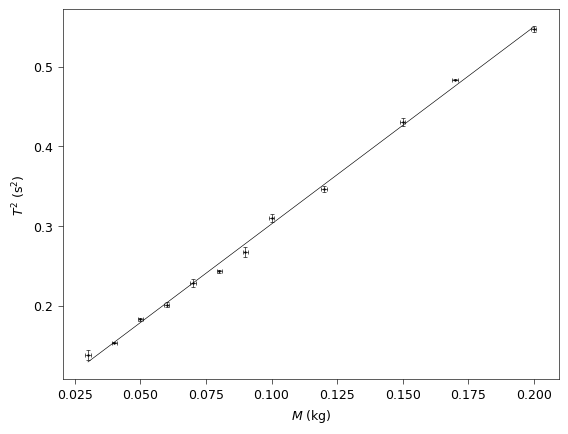

In [83]:
m, n, em, en, r = regresion(datoss['m'], datoss['t2'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.45
plt.rcParams['xtick.major.width'] = 0.45
plt.rcParams['ytick.major.width'] = 0.45
plt.ylabel('$T^2$ (s$^2$)')
plt.xlabel('$M$ (kg)')
plt.plot([0.03, 0.2], [m*0.03+n, m*0.2+n], color='black', linewidth=0.45)
plt.errorbar(datoss['m'], datoss['t2'], xerr=datoss['em'], yerr=datoss['et2'], ls='none', capsize = 1.5, elinewidth=0.45, ecolor='black', capthick=0.45)
plt.scatter(datoss['m'], datoss['t2'], s=0.6, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/hooke/figures/regresión2.png', dpi=1000, bbox_inches='tight')
plt.show()

In [84]:
print('m:', rd(m, em))
m, em = rd(m, em)
m, em = float(m), float(em)
print('n:', rd(n, en))
n, en = rd(n, en)
n, en = float(n), float(en)

m: ('2.47', '0.04')
n: ('0.055', '0.004')


In [85]:
k = 4*math.pi**2/m
ek = em*4*math.pi**2/m**2

In [86]:
print('k:', rd(k, ek))
k, ek = rd(k, ek)
k, ek = float(n), float(en)

k: ('16.0', '0.3')


In [87]:
am = n/m
eam = math.sqrt((n**2)*(en**2)+em**2)/m

In [88]:
print('am: ', rd(am, eam))
am , eam = rd(am, eam)
am, eam = float(am), float(eam)

am:  ('0.022', '0.016')


In [89]:
mue = 3*am
emue = 3*eam
print('m: ', rd(mue, emue))
mue, emue = rd(mue, emue)
mue, emue = float(mue), float(emue)

m:  ('0.07', '0.05')


In [90]:
den = 1/0.13**2 + 1/0.3**2
kk = (15.83/0.13**2 + 16/0.3**2)/den
ekk = 1/math.sqrt(den)
print(rd(kk, ekk))

('15.86', '0.12')
